In [ ]:
"D:/semester4/90089/90089/final_ml_data.csv"

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset (adjust the path as needed)
data = pd.read_csv("D:/semester4/90089/90089/final_ml_data.csv")

# Fill NaN values with 0 in columns 'N170', 'N171', 'N172', 'N178', 'N179' (assuming NaN means no condition)
data[['N170', 'N171', 'N172', 'N178', 'N179']] = data[['N170', 'N171', 'N172', 'N178', 'N179']].fillna(0)

# Create target variable for AKI occurrence
data['aki_occurred'] = data[['N170', 'N171', 'N172', 'N178', 'N179']].max(axis=1)

# Ensure there are no NaN values in feature columns
feature_cols = [
    'drug_encoded', 'creatinine_level', 'previous_creatinine_level', 
    'creatinine_change', 'gender_encoded', 'anchor_age', 
    'race_encoded', 'avg_bmi'
]
data[feature_cols] = data[feature_cols].fillna(0)  # You can also choose to drop rows instead: data.dropna(subset=feature_cols, inplace=True)

# Remove duplicate records based on 'subject_id' and 'hadm_id'
data = data.drop_duplicates(subset=['subject_id', 'hadm_id'])

# Target variable
target_col = 'aki_occurred'

# Splitting data into features (X) and target (y)
X = data[feature_cols]
y = data[target_col]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check for imbalance in the target variable
print("Class distribution in target variable 'aki_occurred':")
print(y_train.value_counts())

# If imbalance exists, use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Re-check the class distribution in the resampled training data
print("Class distribution after applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Train the Decision Tree Classifier on resampled data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy after handling class imbalance: {accuracy_dt:.4f}")

# Classification report for more detailed performance metrics
print("Decision Tree Classification Report after handling class imbalance:")
print(classification_report(y_test, y_pred_dt))

Class distribution in target variable 'aki_occurred':
aki_occurred
0.0    72930
1.0    10237
Name: count, dtype: int64
Class distribution after applying SMOTE:
aki_occurred
1.0    72930
0.0    72930
Name: count, dtype: int64
Decision Tree Accuracy after handling class imbalance: 0.8343
Decision Tree Classification Report after handling class imbalance:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91     31292
         1.0       0.32      0.31      0.32      4351

    accuracy                           0.83     35643
   macro avg       0.61      0.61      0.61     35643
weighted avg       0.83      0.83      0.83     35643



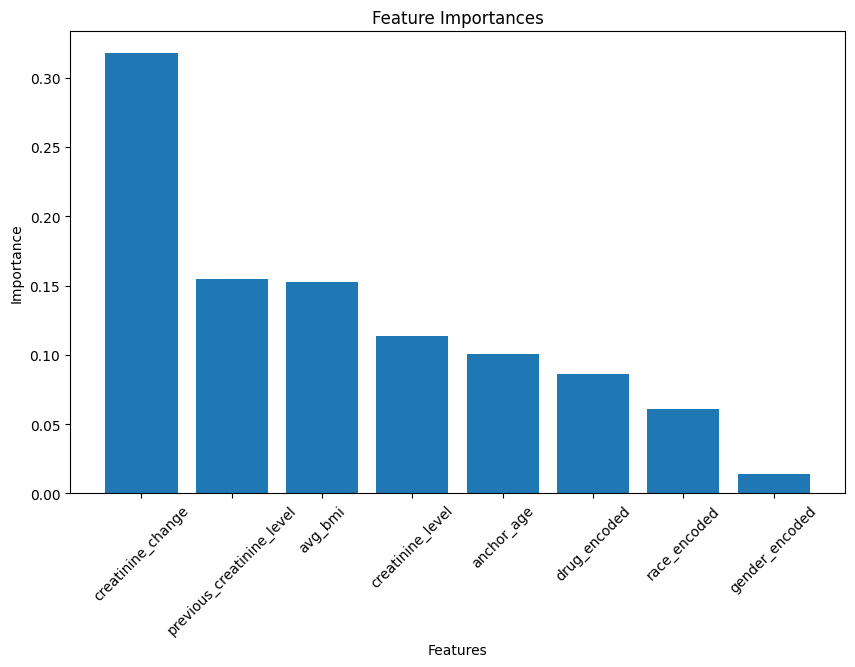

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the decision tree model
feature_importances = dt_classifier.feature_importances_

# Feature names (in the same order as in the feature_cols list)
features = [
    'drug_encoded', 'creatinine_level', 'previous_creatinine_level', 
    'creatinine_change', 'gender_encoded', 'anchor_age', 
    'race_encoded', 'avg_bmi'
]

# Sorting the feature importances for visualization
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
